In [4]:
import numpy as np
import pandas as pd
import os

pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
# import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

CSV_PATH = os.path.join("datasets", "adult.data.csv")
data = pd.read_csv(CSV_PATH)
data.head() 




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:

q1 = data['age'].quantile(.25)
q3 = data['age'].quantile(.75)
print(q1,q3)

iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
print(toprange,botrange)
copydf = data
copydf = copydf.drop(copydf[copydf['age'] > toprange].index)
copydf = copydf.drop(copydf[copydf['age'] < botrange].index)
copydf.head()

28.0 48.0
78.0 -2.0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B97E310>]],
      dtype=object)

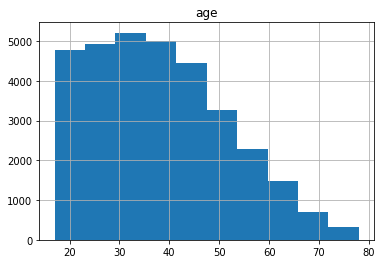

In [25]:
# Method 2: Interquartile Range
copydf.hist(column='age', bins=10)

In [30]:
names = ['Bob','Jessica','Mary','John','Mel']
grades = [76,95,77,78,99]
bsdegrees = [1,1,0,0,1]
msdegrees = [2,1,0,0,0]
phddegrees = [0,1,0,0,0]
bdates = ['1/1/1945','10/21/76','3/3/90',
'04/30/1901','1963-09-01']
GradeList = list(zip(names,grades,bsdegrees,msdegrees,
phddegrees,bdates))
columns=['Names','Grades','BS','MS','PhD',"bdates"]
df = pd.DataFrame(data = GradeList, columns=columns)
df.bdates

0      1/1/1945
1      10/21/76
2        3/3/90
3    04/30/1901
4    1963-09-01
Name: bdates, dtype: object

In [33]:
from time import strftime
from datetime import datetime
def standardize_date(thedate):
    formatted_date = ""
    thedate = str(thedate)
    if not thedate or thedate.lower() == "missing" or thedate == "nan":
        formatted_date = "MISSING"
    if thedate.lower().find('x') != -1:
        formatted_date = "Incomplete"
    if thedate[0:2] == "00":
        formatted_date = thedate.replace("00", "19")
    try:
        formatted_date = str(datetime.strptime(thedate,'%m/%d/%y').strftime('%m/%d/%y'))
    except:
        pass
    try:
        formatted_date = str(datetime.strptime(thedate, '%m/%d/%Y').strftime('%m/%d/%y'))
    except:
        pass
    try:
        if int(thedate[0:4]) < 1900:
            formatted_date = "Incomplete"
        else:
            formatted_date = str(datetime.strptime(thedate, '%Y-%m-%d').strftime('%m/%d/%y'))
    except:
        pass
    return formatted_date

df.bdates = df.bdates.apply(standardize_date)
df

,Names,Grades,BS,MS,PhD,bdates
0,Bob,76,1,2,0,01/01/45
1,Jessica,95,1,1,1,10/21/76
2,Mary,77,0,0,0,03/03/90
3,John,78,0,0,0,04/30/01
4,Mel,99,1,0,0,09/01/63
